# Microsoft Store product review

## Insights
### 1. What is the average rating and No of people Rated?
### 2. Most selling and least selling product?
### 3. Which category has more rating and reviews given?
### 4. Which year has the highest number of rating?
### 5. What count of customer chossing free or paid subscription?


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

In [16]:
df=pd.read_csv('msft.csv')
df.head()

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


In [17]:
df.shape

(5322, 6)

##### Remove NAN values

In [18]:
df.isnull().sum()

Name                  1
Rating                1
No of people Rated    0
Category              1
Date                  1
Price                 1
dtype: int64

In [19]:
df.dtypes

Name                   object
Rating                float64
No of people Rated      int64
Category               object
Date                   object
Price                  object
dtype: object

In [20]:
df1=df.dropna(axis=0)

In [21]:
df1.isnull().sum()

Name                  0
Rating                0
No of people Rated    0
Category              0
Date                  0
Price                 0
dtype: int64

In [22]:
df1.shape

(5321, 6)

In [23]:
df1.describe()

,Rating,No of people Rated
count,5321.000000,5321.000000
mean,3.792708,551.798722
std,0.991681,259.787733
min,1.000000,100.000000
25%,3.500000,327.000000
50%,4.000000,548.000000
75%,4.500000,779.000000
max,5.000000,1000.000000


##### Avg rating = 3.792708 , No of people Rated= 552

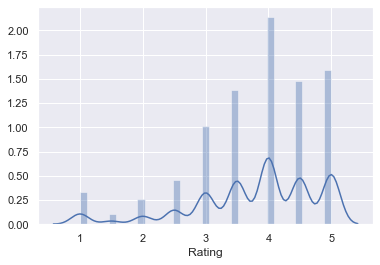

In [28]:
sns.distplot(df1['Rating'])


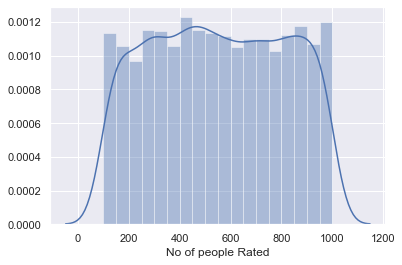

In [26]:
sns.distplot(df1['No of people Rated'])

### Most Selling and High Rating product

In [12]:
df2=df1[['Name','Rating','No of people Rated']].sort_values(['Rating','No of people Rated'],ascending=False)
df2.head()

,Name,Rating,No of people Rated
1883,ILN,5.0,999
319,TookBook,5.0,998
3406,Contemplatio - Rosary with images,5.0,998
3241,Five Good Things,5.0,996
2662,Magenta Health,5.0,993


### Least Selling and Low Rating product

In [15]:
df1[['Name','Rating','No of people Rated']].sort_values(['Rating','No of people Rated'],ascending=True)

,Name,Rating,No of people Rated
3142,Model Railroad Manager,1.0,108
4622,MapWorks Essentials,1.0,108
2273,MSAR,1.0,115
1684,RandomNumberGen,1.0,118
4463,New Age Player,1.0,129
...,...,...,...
2662,Magenta Health,5.0,993
3241,Five Good Things,5.0,996
319,TookBook,5.0,998
3406,Contemplatio - Rosary with images,5.0,998


In [16]:
df3=df1[['Name','No of people Rated','Rating']].loc[df1['Rating']==1.0].sort_values('No of people Rated',ascending=False)
df3.head()

,Name,No of people Rated,Rating
5254,EPS Viewer.,993,1.0
2564,MyCycleTrainer,986,1.0
1514,ConverterTools,975,1.0
4095,Live Online Radio-All Countries,971,1.0
5298,ResX/ResW Editor & Translator,968,1.0


In [17]:
df1.Category.value_counts()

Music                      753
Books                      707
Business                   679
Health and Fitness         527
Developer Tools            500
Lifestyle                  492
News and Weather           483
Kids and Family            345
Social                     328
Food and Dining            166
Navigation and Maps        154
Multimedia Design          117
Government and Politics     70
Name: Category, dtype: int64

### Top selling Categories

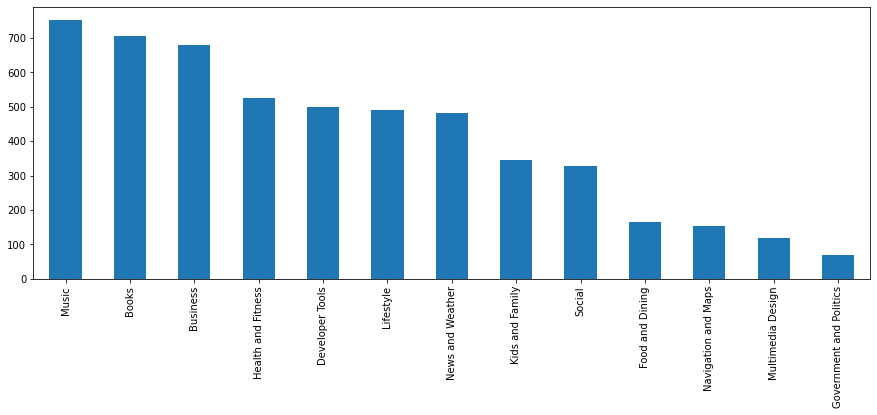

In [18]:
plt.figure(figsize=(15,5))
df1.Category.value_counts().plot(kind='bar')

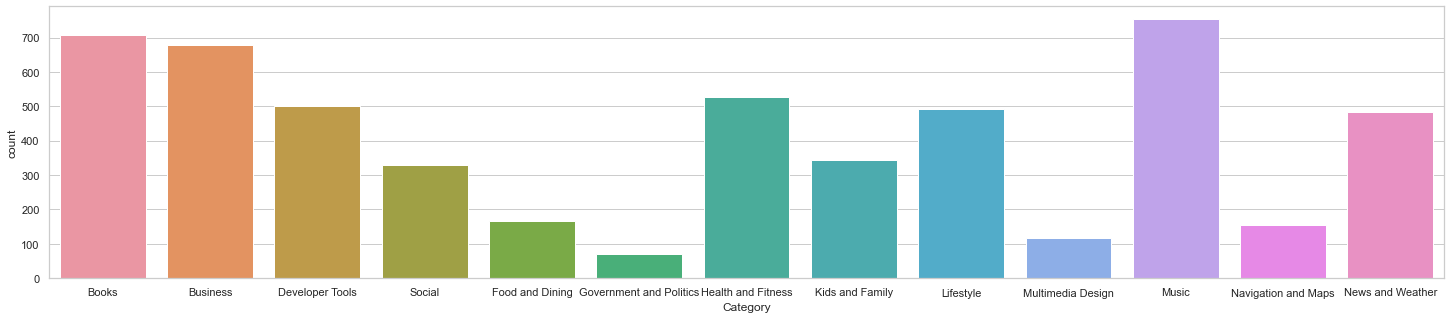

In [96]:
fig = plt.gcf()
fig.set_size_inches(25, 5)
sns.countplot('Category',data=df1)

### Average Ratings for Categories

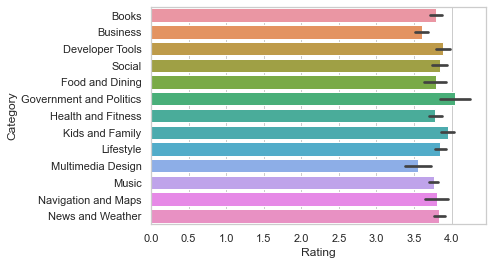

In [51]:
sns.barplot('Rating','Category',data=df1, orient='h')

In [85]:
df1.Price.replace(['₹ 144.00', '₹ 54.00', '₹ 99.00', '₹ 219.00', '₹ 269.00',
       '₹ 134.00', '₹ 164.00', '₹ 109.00', '₹ 1,624.00', '₹ 1,099.00',
       '₹ 1,349.00', '₹ 59.00', '₹ 154.00', '₹ 119.00', '₹ 94.00',
       '₹ 69.00', '₹ 139.00', '₹ 189.00', '₹ 549.00', '₹ 79.00',
       '₹ 2,599.00', '₹ 299.00', '₹ 574.00', '₹ 329.40', '₹ 1,521.80',
       '₹ 324.00', '₹ 824.00', '₹ 5,449.00', '₹ 89.50', '₹ 114.00',
       '₹ 194.00', '₹ 319.00', '₹ 624.00', '₹ 2,149.00', '₹ 1,149.00',
       '₹ 434.00', '₹ 279.00', '₹ 209.00', '₹ 699.00', '₹ 1,899.00',
       '₹ 489.00', '₹ 54.50', '₹ 64.00'], 'Paid',inplace=True)

C:\Users\Navaneeth Krishnan\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


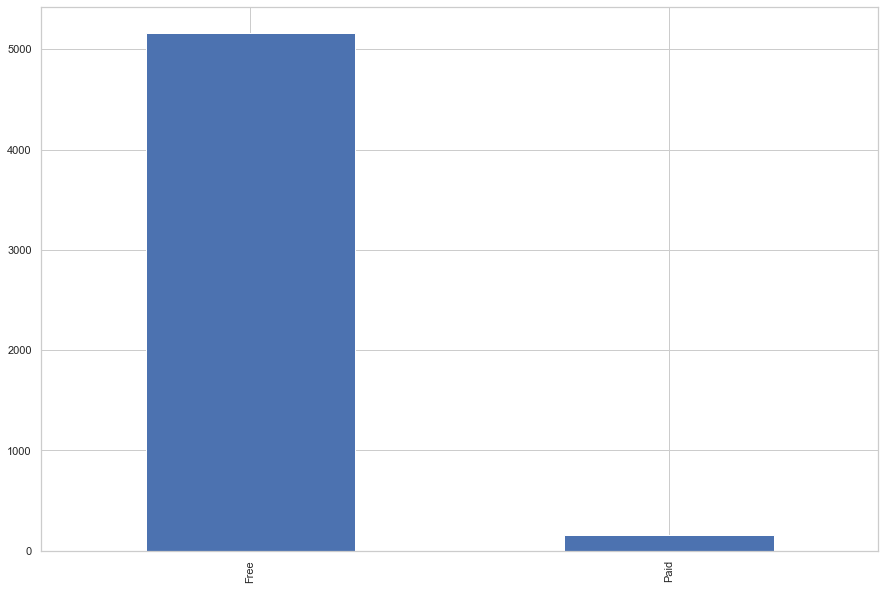

In [86]:
plt.figure(figsize=(15,10))
df1.Price.value_counts().plot(kind='bar')

### Which year has the highest number of rating for each apps?

In [109]:
import datetime
df1['Year'] = pd.DatetimeIndex(df1['Date']).year

<ipython-input-109-481151ab7e9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = pd.DatetimeIndex(df1['Date']).year


In [99]:
df1.head()

,Name,Rating,No of people Rated,Category,Date,Price,Year
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free,2014
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free,2014
2,BookViewer,3.5,593,Books,29-02-2016,Free,2016
3,Brick Instructions,3.5,684,Books,30-01-2018,Free,2018
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free,2018


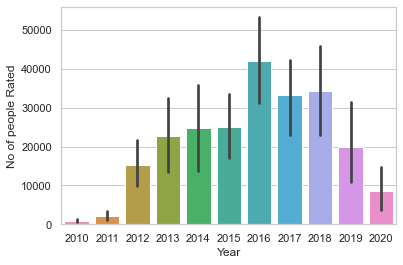

In [114]:
year = df1.groupby(['Year', 'Category'])['No of people Rated'].sum()
year = pd.DataFrame(year.reset_index())
sns.barplot('Year','No of people Rated',data=year)